In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
import sklearn
import scipy
from sklearn.metrics import (classification_report,accuracy_score, precision_score, 
                             recall_score, f1_score, matthews_corrcoef)
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold


labels=['Normal', 'Fraud']



df=pd.read_csv('creditcard.csv')
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [2]:
df.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

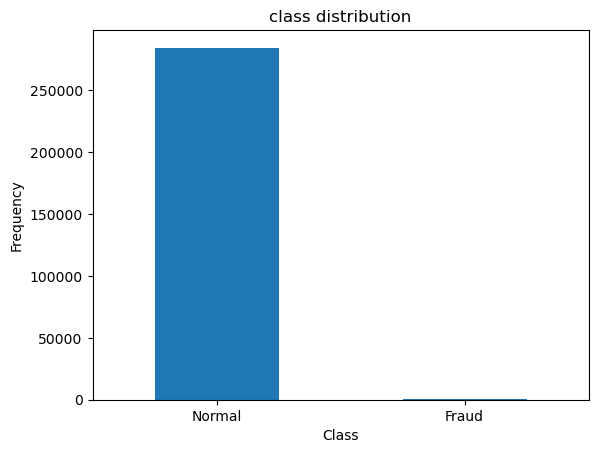

In [3]:
count_classes=pd.value_counts(df['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title('class distribution')
plt.xticks(range(2), labels)
plt.xlabel('Class')
plt.ylabel('Frequency')

In [4]:
df.shape

(284807, 31)

In [5]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
fraction = len(fraud)/float(len(valid))

print(fraction)
print("Fraud Cases: {}".format(len(df[df['Class'] == 1])))
print("Valid Cases: {}".format(len(df[df['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Cases: 284315


## our data is highly imbalanced with only 0.17% of all transactions being fraud

In [ ]:
X = df.drop(['Class'], axis=1 )
y = df['Class']

print(X.shape)
print(y.shape)

X_credit = X.values
y_credit = y.values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Define a range of estimator values to try
estimator_range = [50, 100, 150]

# Initialize an empty list to store cross-validation scores for each estimator value
cv_scores = []

# Perform k-fold cross-validation (e.g., 5-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=20)

# Loop through each estimator value and compute cross-validation scores
for n_estimators in estimator_range:
    # Create a Random Forest Classifier with the current number of estimators
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=20)
    
    # Compute cross-validation scores for the current estimator value
    scores = cross_val_score(rf_classifier, X, y, cv=kf, scoring='accuracy')
    cv_scores.append(np.mean(scores))

# Find the number of estimators with the highest cross-validation score
best_n_estimators = estimator_range[np.argmax(cv_scores)]

print("Best Number of Estimators:", best_n_estimators)



In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=20, class_weight=class_weights)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)



print(f"The accuracy is {acc}")

prec = precision_score(y_test, y_pred)
print(f"The precision score is {prec}")

rec = recall_score(y_test, y_pred)
print(f"The recall score is {rec}")

f1 = f1_score(y_test, y_pred)
print(f"The f1 score is {f1}")

MCC = matthews_corrcoef(y_test, y_pred)
print(f"The Matthews correlation coeficient is {MCC}")

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Read the CSV file into a DataFrame
file_path = 'creditcard.csv'  # Replace with the path to your CSV file
df = pd.read_csv(file_path)

# Assuming you have a target column named 'target_column_name'
target_column_name = 'Class'  # Replace with your actual target column name

# Separate features (X) and the target (y)
X = df.drop(columns=[target_column_name])
y = df[target_column_name]

# Apply SMOTE to balance the data
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Create and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85195
           1       1.00      1.00      1.00     42747

    accuracy                           1.00    127942
   macro avg       1.00      1.00      1.00    127942
weighted avg       1.00      1.00      1.00    127942



In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Read the CSV file into a DataFrame
file_path = 'creditcard.csv'  # Replace with the path to your CSV file
df = pd.read_csv(file_path)

# Assuming you have a target column named 'target_column_name'
target_column_name = 'Class'  # Replace with your actual target column name

# Separate features (X) and the target (y)
X = df.drop(columns=[target_column_name])
y = df[target_column_name]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.80      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443

